# Association Rules Analysis

The Apriori algorithm is used on frequent itemsets to generate association rules, and it is designed to work on the databases that contain transactions. We can use association rules to determine how strong or how weak two objects are connected.

## Objective

After completing this lab you will be able to:
*   Understand the apriori algorithm
*   Use apriori algorithm to generate association rules

## Overview of Apriori Algorithm

Association rules are if-then statements that help to show the probability of relationships between data items within large datasets in various types of databases. Association rule learning is a technique that checks for the dependency of one data item on another data item and maps them accordingly. It tries to find relations or associations among the dataset’s variables. For example, if customers buy bread, they most likely can buy butter, eggs, or milk, so it makes sense to store these products nearby.

The Apriori algorithm is used on frequent itemsets to generate association rules, and it is designed to work on the databases that contain transactions. We can use association rules to determine how strong or how weak two objects are connected. Frequent itemsets are those whose support value (see below) is greater than the user-specified minimum support value.

The most common problems that this algorithm helps to solve are:

- Product recommendation
- Market busket recommendation

There are three major parts of the Apriori algorithm.
- Support
- Confidence
- Lift

Let’s imagine we have a history of 3000 customers’ transactions in our database, and we have to calculate the Support, Confidence, and Lift to figure out how likely the customers who’re buying Biscuits will buy Chocolate.

Here are some numbers from our dataset:

- 3000 customers’ transactions
- 400 out of 3000 transactions contain of Biscuit purchases
- 600 out of 3000 transactions contain of Chocolate purchases
- 200 out of 3000 transactions describes purchases when customers bought Biscuits and Chocolates together

### Support

**Support** shows the overall popularity of an item in the dataset. It can be calculated by finding the number of transactions containing a particular item divided by the total number of transactions:

$$\textbf{support}(A) = \frac{\text{number of transactions containing A}}{\text{total number of transactions}}$$

in our case, the support values for biscuit will be:

$$\textbf{support}(biscuits) = \frac{400}{3000} = 13.33\%$$

### Confidence

**Confidence** shows how often items in a transaction set B to appear in transactions set containing only A.

$$\textbf{confidence}(A \rightarrow B) = \frac{\text{number of transactions containing A and B}}{\text{number of transactions containing A}} $$

In our case, the confidence value shows the probability that the customers will buy Chocolate if they buy Biscuits. To calculate this value, we need to divide the number of transactions that contain Biscuits and Chocolates by the total number of transactions having Biscuits:

$$\textbf{confidence}(biscuits \rightarrow chocolate) = \frac{\text{200}}{\text{400}} = 50\% $$

It means we are confident that 50 percent of customers who bought Biscuits will buy Chocolates too.

### Lift

**Lift** describes how much confidence is increased if B will be purchased when the customer buys the A:

$$\textbf{lift}(A \rightarrow B) = \frac{confidence(A \rightarrow B)}{support(B)}$$

In our case, the lift value shows the potential increase in the ratio of the sale of Chocolates when you sell Biscuits. The larger the value of the lift, the better.

$$\textbf{lift}(biscuits \rightarrow chocolate) = \frac{50}{13.33} = 13.75$$

### Algorithm steps

The Apriori algorithm consists of the following are the steps:

- Start with itemsets containing just a single item (Individual items)
- Determine the support for itemsets
- Keep the itemsets that meet the minimum support threshold and remove itemsets that do not support minimum support
- Using the itemsets that is kept from Step 1, generate all the possible itemset combinations.
- Repeat steps 1 and 2 until there are no more new itemsets.

Let’s take a look at these steps while using a sample dataset:

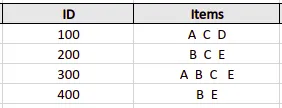

First, the algorithm will create a table containing each item set’s support count in the given dataset – the Candidate set:

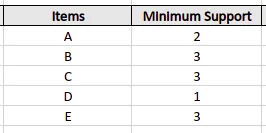

Let’s assume that we’ve set up the **minimum support** value to 3, which means the algorithm will drop all the items having a support value of less than three.

The algorithm will take out all the itemsets with a greater support count than the minimum support (**frequent itemset**) in the next step:

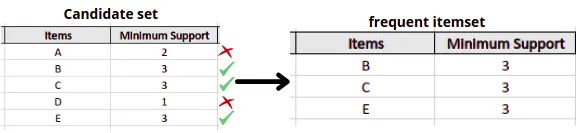

Next, the algorithm will generate the second candidate set (C2) with the help of the frequent itemset (L1) from the previous calculation. The candidate set 2 (C2) will be formed by creating the pairs of itemsets of L1. After creating new subsets, the algorithm will again find the support count from the main transaction table of datasets by calculating how many times these pairs have occurred together in the given dataset.

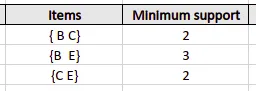

After that, the algorithm will compare the C2’s support count values with the minimum support count (3), and the itemset with less support count will be eliminated from table C2.

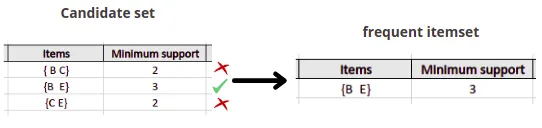

Finally, the algorithm can create different association rules using the last frequent itemset.

## Practice using Apriori Algorithm

We will use the market basket optimization dataset (you downloaded from the LMS).

### Exploring dataset

In [ ]:
# Importing module
import pandas as pd

# Write code to load the dataset and check the shape of the dataset



In [ ]:
# Show first five rows of the dataset



### Visualizing the dataset

As you can see, there are a lot of null values in our dataset, and it isn’t easy to figure out which item has been purchased more. We can iterate through our data and store each item in a separate numpy array.

Let’s print out the top 10 most frequent items from the dataset.

In [ ]:
# importing module
import numpy as np

# Gather All Items of Each Transactions into Numpy Array
transaction = []
for i in range(0, data.shape[0]):
    transaction.append([str(data.values[i, j]) for j in range(0, data.shape[1])])

# converting to numpy array
transaction = np.array(transaction)

#  Transform Them a Pandas DataFrame
df = pd.DataFrame(transaction.flatten(), columns=["items"]) 

# Put 1 to Each Item For Making Countable Table, to be able to perform Group By
df["incident_count"] = 1 

#  Delete NaN Items from Dataset
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

# Making a New Appropriate Pandas DataFrame for Visualizations

## Write code to sum items and sort values by incident_count


#  Initial Visualizations
df_table.head(10).style.background_gradient(cmap='Greens')

The output shows that 'mineral water' has been purchased more frequently than other products.

A treemapping is a method for displaying hierarchical data using nested figures, usually rectangles. We can use a [treemap](https://en.wikipedia.org/wiki/Treemapping) to visualize all the items from our dataset more interactive.

The **plotly** libray help us to create treemap easily.

In [ ]:
%pip install plotly

In [ ]:
# importing required module
import plotly.express as px

# to have a same origin
df_table["all"] = "all" 

# creating tree map using plotly
fig = px.treemap(df_table.head(30), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(30), hover_data=['items'],
                  color_continuous_scale='Greens',
                )
# ploting the treemap
fig.show()

### Data pre-processing

To use the Apriori algorithm and get the most frequent itemsets, we must transform our dataset into a True – False matrix where rows are transactions and columns are products.

Possible cell’s values are:

- `True` - the transction contains the items
- `False` - transaction does not contain the item

The `mlextend` helps us to work with Apriori algorithm efficiently.

In [ ]:
!pip install mlxtend

In [ ]:
# importing the required module
from mlxtend.preprocessing import TransactionEncoder

# initializing the transactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)

# dataset after encoded
dataset

We have 121 columns/features at the moment. Extracting the most frequent itemsets from 121 features would be compelling. So, we will start with the Top 50 items.

#### Top 50 items

In [ ]:
# select top 50 items
first50 = df_table["items"].head(50).values 

# Extract Top50
dataset = dataset.loc[:,first50] 

# shape of the dataset
dataset.shape

#### Apriori algorithm

In [ ]:
# importing the required module
from mlxtend.frequent_patterns import apriori,association_rules


# Extracting the most frequest itemsets via Mlxtend.
# The length column has been added to increase ease of filtering.
frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# printing the frequent itemset
frequent_itemsets

The output shows that mineral water is the most frequently occurring item in our dataset. We can explore the frequent item more to get the inside. For example, we can print out all items with a length of 2, and the minimum support is more than 0.05.

In [ ]:
# printing the frequntly items 
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]


The output shows that the eggs and mineral water combination are the most frequently occurring items when the length of the itemset is two.

Similarly, we can find the most frequently occurring items when the itemset length is 3:

In [ ]:
# printing the frequntly items with length 3
frequent_itemsets[ (frequent_itemsets['length'] == 3) ].head(3)

The output shows that the most frequent items with the length of three are eggs, spaghetti, and mineral water.

### Creating association rules

We know that the association rules are simply the if-else statements. The IF component of an association rule is known as the antecedent. The THEN component is known as the consequent. The antecedent and the consequent are disjoint; they have no items in common.

So, let’s create antecedents and consequents:

In [ ]:
#  We set our metric as "Lift" to define whether antecedents & consequents are dependent or not
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

The output shows the values of various supporting components of the Apriori algorithm.

To get more insights from the data, let’s sort the data by the confidence value:

In [ ]:
# Sort values based on confidence
rules.sort_values("confidence",ascending=False)

This table shows the relationship between different items and the likelihood of a customer buying those items together. For example, according to the table above, the customers who purchased eggs and ground beef are expected to buy mineral water with a likelihood of 50% (confidence).

## Summary

The Apriori algorithm allows you to mine for frequent itemset and learns association rules between items over large datasets of transactions. The algorithm identifies the frequent individual items in the transactions.